# data conversions

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
pd.options.display.max_rows=10
pd.options.display.max_seq_items=4
pd.__version__

'0.18.1'

# dates

In [2]:
idx = pd.date_range('20130101',freq='h',periods=10000)
idx

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               ...
               '2014-02-21 14:00:00', '2014-02-21 15:00:00'], dtype='datetime64[ns]', length=10000, freq='H')

In [3]:
strings = idx.strftime('%Y%m')
strings

array(['201301', '201301', '201301', ..., '201402', '201402', '201402'], 
      dtype='<U6')

In [4]:
def slow_format(strings):
    return [ pd.to_datetime(s,format='%Y%m') for s in strings ]
def reg_format(strings):
    return pd.to_datetime(strings,format='%Y%m')
def fast_format(strings):
    return pd.to_datetime(np.array(strings).astype(int)*100+1,
                          format='%Y%m%d')

In [5]:
results = [slow_format(strings), reg_format(strings), fast_format(strings)]

from itertools import permutations
np.array(list(map(lambda x: x[0] == x[1], permutations(results, 2)))).all()

True

In [6]:
t = {}

In [7]:
x = %timeit -o slow_format(strings)
t['slow'] = x.best

1 loop, best of 3: 938 ms per loop


In [8]:
x = %timeit -o reg_format(strings)
t['reg'] = x.best

10 loops, best of 3: 27.4 ms per loop


In [9]:
x = %timeit -o fast_format(strings)
t['fast'] = x.best

100 loops, best of 3: 8.63 ms per loop


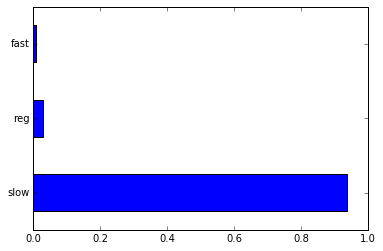

In [10]:
(Series(t).sort_values(ascending=False)
          .plot
          .barh()
 )

# csv and dates

In [11]:
fn = 'data/csv_and_dates.csv'
N = int(1e4)
df = DataFrame({'A' : np.random.randn(N)}, 
               index=pd.date_range('20130101',freq='s',periods=N))
df.index = df.index.format(date_format='%Y/%b/%d %H:%M:%S')
df.index.name ='dates'
df.to_csv(fn)

In [12]:
!head 'data/csv_and_dates.csv'

dates,A
2013/Jan/01 00:00:00,-0.3885784695675464
2013/Jan/01 00:00:01,1.5426198986914668
2013/Jan/01 00:00:02,2.24087882785293
2013/Jan/01 00:00:03,0.6636148618665987
2013/Jan/01 00:00:04,0.9601101790673733
2013/Jan/01 00:00:05,-0.7880563856868205
2013/Jan/01 00:00:06,-0.22137936343824866
2013/Jan/01 00:00:07,-1.417785169920416
2013/Jan/01 00:00:08,0.847959863264044


In [13]:
def read_dp():
    dp = lambda s: datetime.datetime.strptime(s,'%Y/%b/%d %H:%M:%S')
    return pd.read_csv(fn,
                       date_parser=dp,
                       index_col='dates')
def read_reg():
    return pd.read_csv(fn,parse_dates=['dates'],
                       index_col='dates')
def read_infer():
    return pd.read_csv(fn,parse_dates=['dates'],
                       infer_datetime_format=True,
                       index_col='dates')
def read_post_convert():
    df = pd.read_csv(fn,
                     index_col='dates')
    df.index = pd.to_datetime(df.index,
                              format='%Y/%b/%d %H:%M:%S')
    return df

In [14]:
results = [read_dp(),read_reg(),read_infer(),read_post_convert()]

from itertools import permutations
np.array(list(map(lambda x: x[0].equals(x[1]), permutations(results, 2)))).all()

True

In [15]:
t = {}

In [16]:
x = %timeit -o read_dp()
t['dp'] = x.best

10 loops, best of 3: 147 ms per loop


In [17]:
x = %timeit -o read_reg()
t['reg'] = x.best

1 loop, best of 3: 1.3 s per loop


In [18]:
x = %timeit -o read_infer()
t['infer'] = x.best

10 loops, best of 3: 59.2 ms per loop


In [19]:
x = %timeit -o read_post_convert()
t['post_convert'] = x.best

10 loops, best of 3: 57.5 ms per loop


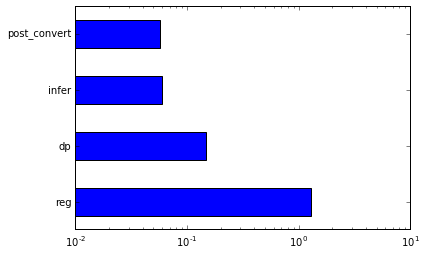

In [21]:
(Series(t).sort_values(ascending=False)
          .plot
          .barh(log=True)
 )